In [2]:
import zipfile
with zipfile.ZipFile('cardataset.zip') as myzip:
    myzip.extractall()

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
df = pd.read_csv('data.csv')

In [43]:
# make the column headers and the individual values more consistent
df.columns = df.columns.str.lower().str.replace(' ', '_')



In [44]:
string_columns = [col for col in df.columns if df[col].dtype == 'object']

In [45]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

[]

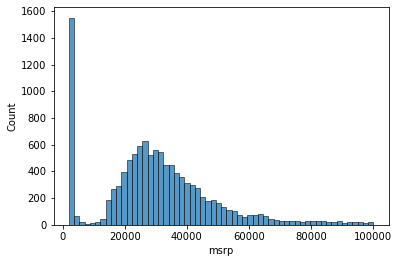

In [48]:
sns.histplot(df.msrp[df.msrp < 100000])
plt.plot()

[]

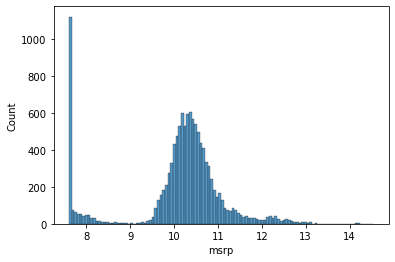

In [50]:
sns.histplot(np.log1p(df.msrp))
plt.plot()

In [51]:
# checking for missing values
np.sum(df.isnull())

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [52]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [56]:
#splitting the dataset into 3 parts: train, validate, test
n = len(df)
n_val = int(0.2 *n)
n_test= int(0.2 *n)
n_train= n - (n_val + n_test)

In [97]:
# shuffle the data
np.random.seed(2)
index = np.array(np.arange(n))

In [98]:
np.random.shuffle(index)

In [104]:
df_shuffled = df.iloc[index]

In [111]:
df_train = df_shuffled.iloc[0:n_train].copy()
df_test  = df_shuffled.iloc[n_train : n_train + n_test].copy()
df_val   = df_shuffled.iloc[n_train+n_test : ].copy()

In [114]:
ytrain = np.log1p(df_train.msrp.values)
ytest  = np.log1p(df_test.msrp.values)
yval   = np.log1p(df_val.msrp.values)

In [118]:
del df_train['msrp']
del df_test['msrp']


AttributeError: module 'pandas' has no attribute 'drop'